In [1]:
from imutils import face_utils
import dlib
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)
outputPath = '../output/'
dbPath = '../faces/'

In [3]:
def oklesgo():
    for filePath in sorted(os.listdir(outputPath)):

        if filePath.endswith(".jpg"):
            print(outputPath)
            print(filePath)
            image = cv2.imread(os.path.join(outputPath, filePath))
            # convert to floating point?
            # image = np.float32(image) / 255.0

            # image = imutils.resize(image, 600, 600)
            rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            rects = detector(rgb, 0)
            rects2 = detector(grey, 0)
            print("Number of faces detected: {}".format(len(rects2)))
            for i, d in enumerate(rects2):
                print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
                    i, d.left(), d.top(), d.right(), d.bottom()))
            rect = rects[0]
            rect2 = rects2[0]
            landmarks = predictor(rgb, rect)
            landmarks = face_utils.shape_to_np(landmarks)  # these are the 68 landmarks
            # print(landmarks)
            landmarks2 = predictor(grey, rect2)
            landmarks2 = face_utils.shape_to_np(landmarks2)
            # print(len(landmarks2))
            # print(landmarks2)  # this seems more accurate!
            newName = outputPath + filePath + "G.txt"
            print(newName)
            file_object = open(newName, "w")
            np.savetxt(file_object, landmarks2, fmt="%d", delimiter=" ")
            file_object.close()

In [4]:
def read_output_txt(name):
    # landmarks = np.loadtxt(name, dtype=int, delimiter='\n')
    # file = open(name, "r")
    # landmarks = list(map(int, file.read().split("\n")))
    img = cv2.imread(name)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects2 = detector(grey, 0)
    rect2 = rects2[0]
    landmarks2 = predictor(grey, rect2)
    landmarks2 = face_utils.shape_to_np(landmarks2)

    return landmarks2

In [5]:
def euclidean_distance(arr1, arr2):
    return np.sqrt((arr1[0] - arr2[0]) ** 2 + (arr1[1] - arr2[1]) ** 2)

In [6]:
# Read points from text files in directory
def readPoints(path):
    # Create an array of array of points.
    pointsArray = []

    # List all files in the directory and read points from text files one by one
    for filePath in sorted(os.listdir(path)):

        if filePath.endswith("G.txt"):

            # Create an array of points.
            points = []

            # Read points from filePath
            with open(os.path.join(path, filePath)) as file:
                for line in file:
                    x, y = line.split()
                    points.append((int(x), int(y)))

            # Store array of points
            pointsArray.append(points)

    return pointsArray

In [7]:
# Read all jpg images in folder.
def readImages(path):
    # Create array of array of images.
    imagesArray = []

    # List all files in the directory and read points from text files one by one
    for filePath in sorted(os.listdir(path)):

        if filePath.endswith(".jpg"):
            # Read image found.
            img = cv2.imread(os.path.join(path, filePath))

            # Convert to floating point
            img = np.float32(img) / 255.0

            # Add to array of images
            imagesArray.append(img)

    return imagesArray

In [8]:
def outputStats():
    landmarks1 = read_output_txt("../output/output1.jpg")
    landmarks2 = read_output_txt("../output/output2.jpg")
    landmarks3 = read_output_txt("../output/output3.jpg")

    # Some statistics that might be interesting:
    # Face width: distance of points 6-12, 1-17, 3-15,
    # Face length: 8-22 , 10-23
    # Mouth width: 49-55
    # Mouth length: 52-58

    bottom_face_width_array = []
    top_face_width_array = []
    middle_face_width_array = []
    left_eye_face_length_array = []
    right_eye_face_length_array = []
    mouth_width_array = []
    mouth_length_array = []

    # Face width
    bottom_face_width1 = euclidean_distance(landmarks1[5], landmarks1[11])
    bottom_face_width_array.append(bottom_face_width1)

    top_face_width1 = euclidean_distance(landmarks1[0], landmarks1[16])
    top_face_width_array.append(top_face_width1)

    middle_face_width1 = euclidean_distance(landmarks1[2], landmarks1[14])
    middle_face_width_array.append(middle_face_width1)

    # Face length
    left_eye_face_length1 = euclidean_distance(landmarks1[7], landmarks1[21])
    left_eye_face_length_array.append(left_eye_face_length1)

    right_eye_face_length1 = euclidean_distance(landmarks1[9], landmarks1[22])
    right_eye_face_length_array.append(right_eye_face_length1)

    # Mouth width && length
    mouth_width1 = euclidean_distance(landmarks1[48], landmarks1[54])
    mouth_width_array.append(mouth_width1)

    mouth_length1 = euclidean_distance(landmarks1[51], landmarks1[57])
    mouth_length_array.append(mouth_length1)

    # Face width
    bottom_face_width2 = euclidean_distance(landmarks2[5], landmarks2[11])
    bottom_face_width_array.append(bottom_face_width2)

    top_face_width2 = euclidean_distance(landmarks2[0], landmarks2[16])
    top_face_width_array.append(top_face_width2)

    middle_face_width2 = euclidean_distance(landmarks2[2], landmarks2[14])
    middle_face_width_array.append(middle_face_width2)

    # Face length
    left_eye_face_length2 = euclidean_distance(landmarks2[7], landmarks2[21])
    left_eye_face_length_array.append(left_eye_face_length2)

    right_eye_face_length2 = euclidean_distance(landmarks2[9], landmarks2[22])
    right_eye_face_length_array.append(right_eye_face_length2)

    # Mouth width && length
    mouth_width2 = euclidean_distance(landmarks2[48], landmarks2[54])
    mouth_width_array.append(mouth_width2)

    mouth_length2 = euclidean_distance(landmarks2[51], landmarks2[57])
    mouth_length_array.append(mouth_length2)

    # Face width
    bottom_face_width3 = euclidean_distance(landmarks3[5], landmarks3[11])
    bottom_face_width_array.append(bottom_face_width3)

    top_face_width3 = euclidean_distance(landmarks3[0], landmarks3[16])
    top_face_width_array.append(top_face_width3)

    middle_face_width3 = euclidean_distance(landmarks3[2], landmarks3[14])
    middle_face_width_array.append(middle_face_width3)

    # Face length
    left_eye_face_length3 = euclidean_distance(landmarks3[7], landmarks3[21])
    left_eye_face_length_array.append(left_eye_face_length3)

    right_eye_face_length3 = euclidean_distance(landmarks3[9], landmarks3[22])
    right_eye_face_length_array.append(right_eye_face_length3)

    # Mouth width && length
    mouth_width3 = euclidean_distance(landmarks3[48], landmarks3[54])
    mouth_width_array.append(mouth_width3)

    mouth_length3 = euclidean_distance(landmarks3[51], landmarks3[57])
    mouth_length_array.append(mouth_length3)

    # Calculating the means
    bottom_face_width_mean = np.mean(bottom_face_width_array)
    top_face_width_mean = np.mean(top_face_width_array)
    middle_face_width_mean = np.mean(middle_face_width_array)
    left_eye_face_length_mean = np.mean(left_eye_face_length_array)
    right_eye_face_length_mean = np.mean(right_eye_face_length_array)
    mouth_width_mean = np.mean(mouth_width_array)
    mouth_length_mean = np.mean(mouth_length_array)

    # Calculating the variances
    bottom_face_width_var = np.var(bottom_face_width_array)
    top_face_width_var = np.var(top_face_width_array)
    middle_face_width_var = np.var(middle_face_width_array)
    left_eye_face_length_var = np.var(left_eye_face_length_array)
    right_eye_face_length_var = np.var(right_eye_face_length_array)
    mouth_width_var = np.var(mouth_width_array)
    mouth_length_var = np.var(mouth_length_array)

In [9]:
def calculate1FaceStats(person, i, j):
    # Some statistics that might be interesting:
    # Face width: distance of points 6-12, 1-17, 3-15,
    # Face length: 8-22 , 10-23
    # Mouth width: 49-55
    # Mouth length: 52-58
    return euclidean_distance(person[i], person[j])

[[651.0007680487021,
  537.3313688963264,
  862.0980222689296,
  322.18783341398847,
  84.0535543567314,
  440.29081298614443,
  257.0175091311874,
  862.0980222689296,
  507.98622028555064],
 [620.1161181585268,
  515.469688730579,
  822.1027916264486,
  311.3149530620076,
  81.02468759581859,
  415.1457575358322,
  246.00203251192866,
  822.1027916264486,
  492.70883897084695],
 [433.6104242289385,
  333.0,
  595.0680633339349,
  213.39634486091836,
  60.00833275470999,
  293.01535795927146,
  171.00292395160966,
  595.0680633339349,
  380.52595180880894],
 [623.4163937530036,
  473.2958905378326,
  800.3905296791061,
  308.0795351853154,
  80.50465825031493,
  391.0051150560565,
  236.47621444872632,
  800.3905296791061,
  477.0167711936342],
 [611.0613717131856,
  476.66550116407626,
  798.0538828926277,
  307.35809733924367,
  80.09993757800315,
  396.4605907275022,
  239.35329536064467,
  798.0538828926277,
  477.4149138851865],
 [120.06664815842908,
  64.1248781675256,
  95.0,
 

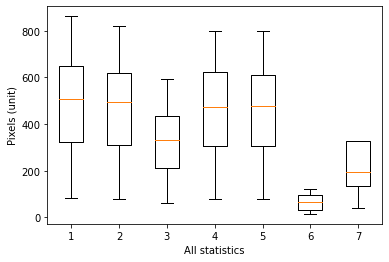

In [10]:
def dbStats():
    # Array of array of points (numImages * 68)
    dbPoints = readPoints(dbPath)

    images = readImages(dbPath)
    numImages = len(images)

    allStats = []

    bottom_face_width_array = []
    top_face_width_array = []
    middle_face_width_array = []
    left_eye_face_length_array = []
    right_eye_face_length_array = []
    mouth_width_array = []
    mouth_length_array = []

    for i in range(0, numImages):
        person_i = dbPoints[i]

        top_face_width = calculate1FaceStats(person_i, 0, 16)
        top_face_width_array.append(top_face_width)

        middle_face_width = calculate1FaceStats(person_i, 2, 14)
        middle_face_width_array.append(middle_face_width)

        bottom_face_width = calculate1FaceStats(person_i, 5, 11)
        bottom_face_width_array.append(bottom_face_width)

        left_eye_face_length = calculate1FaceStats(person_i, 7, 21)
        left_eye_face_length_array.append(left_eye_face_length)

        right_eye_face_length = calculate1FaceStats(person_i, 9, 22)
        right_eye_face_length_array.append(right_eye_face_length)

        mouth_width = calculate1FaceStats(person_i, 48, 54)
        mouth_width_array.append(mouth_width)

        mouth_length = calculate1FaceStats(person_i, 51, 57)
        mouth_length_array.append(mouth_length)

    # top_face_plot = plt.boxplot(top_face_width_array)
    # mid_face_plot = plt.boxplot(middle_face_width_array)
    # bot_face_plot = plt.boxplot(bottom_face_width_array)
    allStats.append(top_face_width_array)
    allStats.append(middle_face_width_array)
    allStats.append(bottom_face_width_array)
    allStats.append(left_eye_face_length_array)
    allStats.append(right_eye_face_length_array)
    allStats.append(mouth_length_array)
    allStats.append(mouth_width_array)
    plt.boxplot(allStats)
    plt.ylabel("Pixels (unit)")
    plt.xlabel("All statistics")
    return allStats

dbStats()

In [11]:
def distance_ratio(mean, new):
    return abs(mean - new) / mean

0.3646853252579803 (array([5]),) 7
39.11521443121589 61.56825268847959
-38.75052910595791
239.7213127474801


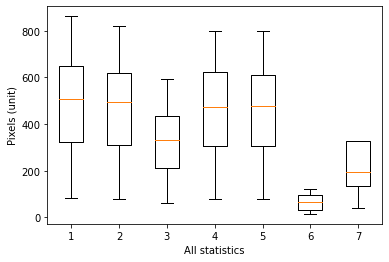

In [12]:
# oklesgo()
# outputStats()
allStats = dbStats()

# Zucc's turn
zuccmark = read_output_txt("../output/tformed_zucc.jpg")

zucc_top_face_width = euclidean_distance(zuccmark[0], zuccmark[16])
zucc_bottom_face_width = euclidean_distance(zuccmark[5], zuccmark[11])
zucc_middle_face_width = euclidean_distance(zuccmark[2], zuccmark[14])
# Face length
zucc_left_eye_face_length = euclidean_distance(zuccmark[7], zuccmark[21])
zucc_right_eye_face_length = euclidean_distance(zuccmark[9], zuccmark[22])
# Mouth width && length
zucc_mouth_length = euclidean_distance(zuccmark[51], zuccmark[57])
zucc_mouth_width = euclidean_distance(zuccmark[48], zuccmark[54])

ratios = []
top_face_ratio = distance_ratio(np.mean(allStats[0]), zucc_top_face_width)
ratios.append(top_face_ratio)
middle_face_ratio = distance_ratio(np.mean(allStats[1]), zucc_middle_face_width)
ratios.append(middle_face_ratio)
bottom_face_ratio = distance_ratio(np.mean(allStats[2]), zucc_bottom_face_width)
ratios.append(bottom_face_ratio)
left_eye_ratio = distance_ratio(np.mean(allStats[3]), zucc_left_eye_face_length)
ratios.append(left_eye_ratio)
right_eye_ratio = distance_ratio(np.mean(allStats[4]), zucc_right_eye_face_length)
ratios.append(right_eye_ratio)
mouth_length_ratio = distance_ratio(np.mean(allStats[5]), zucc_mouth_length)
ratios.append(mouth_length_ratio)
mouth_width_ratio = distance_ratio(np.mean(allStats[6]), zucc_mouth_width)
ratios.append(mouth_width_ratio)


maxRatio = np.amax(ratios)
index = np.where(ratios == maxRatio)
#index = 5 so mouth length is the biggest difference!
print(maxRatio, index, len(ratios))
print(zucc_mouth_length, np.mean(allStats[5]))
print(ratios[5] - zucc_mouth_length)

#Found that mouth is bigger than average

# What's his second biggest? the bottom of his face > than average.
print(zucc_bottom_face_width - bottom_face_ratio)

0.21909716292583498 (array([6]),) 7
162.00308639035245 207.456137561665
-161.78398922742662
301.8906318150795


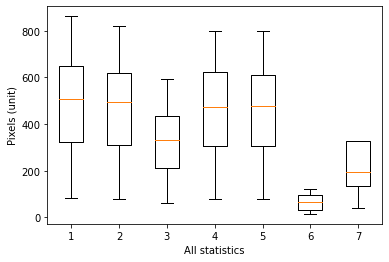

In [17]:
# oklesgo()
# outputStats()
allStats = dbStats()

# Musk's turn
zuccmark = read_output_txt("../output/tformed_musk.jpg")

zucc_top_face_width = euclidean_distance(zuccmark[0], zuccmark[16])
zucc_bottom_face_width = euclidean_distance(zuccmark[5], zuccmark[11])
zucc_middle_face_width = euclidean_distance(zuccmark[2], zuccmark[14])
# Face length
zucc_left_eye_face_length = euclidean_distance(zuccmark[7], zuccmark[21])
zucc_right_eye_face_length = euclidean_distance(zuccmark[9], zuccmark[22])
# Mouth width && length
zucc_mouth_length = euclidean_distance(zuccmark[51], zuccmark[57])
zucc_mouth_width = euclidean_distance(zuccmark[48], zuccmark[54])

musk_ratios = []
top_face_ratio = distance_ratio(np.mean(allStats[0]), zucc_top_face_width)
musk_ratios.append(top_face_ratio)
middle_face_ratio = distance_ratio(np.mean(allStats[1]), zucc_middle_face_width)
musk_ratios.append(middle_face_ratio)
bottom_face_ratio = distance_ratio(np.mean(allStats[2]), zucc_bottom_face_width)
musk_ratios.append(bottom_face_ratio)
left_eye_ratio = distance_ratio(np.mean(allStats[3]), zucc_left_eye_face_length)
musk_ratios.append(left_eye_ratio)
right_eye_ratio = distance_ratio(np.mean(allStats[4]), zucc_right_eye_face_length)
musk_ratios.append(right_eye_ratio)
mouth_length_ratio = distance_ratio(np.mean(allStats[5]), zucc_mouth_length)
musk_ratios.append(mouth_length_ratio)
mouth_width_ratio = distance_ratio(np.mean(allStats[6]), zucc_mouth_width)
musk_ratios.append(mouth_width_ratio)


maxRatio = np.amax(musk_ratios)
index = np.where(musk_ratios == maxRatio)
#index = 6 so mouth width is the biggest difference!
print(maxRatio, index, len(musk_ratios))
print(zucc_mouth_width, np.mean(allStats[6]))
print(musk_ratios[6] - zucc_mouth_width)
## IMMA JUST SAY THAT HIS FOREHEAD BIG
#Found that mouth is bigger than average

# What's his second biggest? the bottom of his face > than average.
print(zucc_bottom_face_width - bottom_face_ratio)

### Women Moment

0.298791780821663 (array([4]),) 7
326.02453895374197 464.94683039478855
-325.7257471729203
252.7722722765341


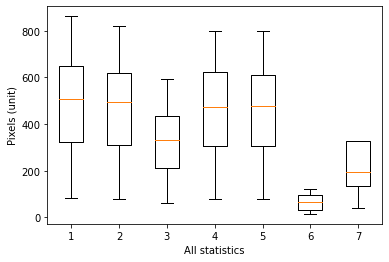

In [18]:
# oklesgo()
# outputStats()
allStats = dbStats()

# Zucc's turn
zuccmark = read_output_txt("../output/tformed_woman.jpg")

zucc_top_face_width = euclidean_distance(zuccmark[0], zuccmark[16])
zucc_bottom_face_width = euclidean_distance(zuccmark[5], zuccmark[11])
zucc_middle_face_width = euclidean_distance(zuccmark[2], zuccmark[14])
# Face length
zucc_left_eye_face_length = euclidean_distance(zuccmark[7], zuccmark[21])
zucc_right_eye_face_length = euclidean_distance(zuccmark[9], zuccmark[22])
# Mouth width && length
zucc_mouth_length = euclidean_distance(zuccmark[51], zuccmark[57])
zucc_mouth_width = euclidean_distance(zuccmark[48], zuccmark[54])

ratios = []
top_face_ratio = distance_ratio(np.mean(allStats[0]), zucc_top_face_width)
ratios.append(top_face_ratio)
middle_face_ratio = distance_ratio(np.mean(allStats[1]), zucc_middle_face_width)
ratios.append(middle_face_ratio)
bottom_face_ratio = distance_ratio(np.mean(allStats[2]), zucc_bottom_face_width)
ratios.append(bottom_face_ratio)
left_eye_ratio = distance_ratio(np.mean(allStats[3]), zucc_left_eye_face_length)
ratios.append(left_eye_ratio)
right_eye_ratio = distance_ratio(np.mean(allStats[4]), zucc_right_eye_face_length)
ratios.append(right_eye_ratio)
mouth_length_ratio = distance_ratio(np.mean(allStats[5]), zucc_mouth_length)
ratios.append(mouth_length_ratio)
mouth_width_ratio = distance_ratio(np.mean(allStats[6]), zucc_mouth_width)
ratios.append(mouth_width_ratio)


maxRatio = np.amax(ratios)
index = np.where(ratios == maxRatio)
#index = 4 so right eye ratio is the biggest difference!
print(maxRatio, index, len(ratios))
print(zucc_right_eye_face_length, np.mean(allStats[4]))
print(ratios[4] - zucc_right_eye_face_length) ## The scale of the difference is bigger for women, upto ~30% scale difference in the order of magnitude of the difference

#Found that mouth is bigger than average

# What's his second biggest? the bottom of his face > than average.
print(zucc_bottom_face_width - bottom_face_ratio)